<a href="https://colab.research.google.com/github/ksi81/WH_8_classification-of-activities-that-a-person-is-engaged-in/blob/main/HW_8_ver1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os

# Path to the zip file
zip_path = 'homework.zip'
extract_folder = '/new/homework'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List the files in the extracted folder
extracted_files = os.listdir(extract_folder)
extracted_files

['data']

In [ ]:
# List the files inside the 'data' folder
data_folder_path = os.path.join(extract_folder, 'data')
data_files = os.listdir(data_folder_path)
data_files

['stairs', 'idle', 'running', 'walking']

In [ ]:
# Path to the 'walking' folder and listing some files within it
walking_folder_path = os.path.join(data_folder_path, 'walking')
walking_files = os.listdir(walking_folder_path)

# Preview the first few lines of each of the first few files
walking_data_previews = {}
for file in walking_files[:3]:  # previewing first 3 files
    file_path = os.path.join(walking_folder_path, file)
    walking_data_previews[file] = pd.read_csv(file_path)

walking_data_previews[walking_files[0]].head(), walking_files[:3]


(   accelerometer_X  accelerometer_Y  accelerometer_Z
 0         3.974375       -12.349293        -2.097321
 1         7.527370       -20.058622       -16.682798
 2         0.660800        -9.658210        -0.995988
 3        -1.264138        -2.442086         1.407791
 4        -2.964022        -9.203311        -0.967257,
 ['walking-17.csv', 'walking-780.csv', 'walking-834.csv'])

In [ ]:
# Function to load data from a folder and compute features
def load_and_compute_features(folder_path):
    files = os.listdir(folder_path)
    features_list = []

    for file in files:
        file_path = os.path.join(folder_path, file)
        data = pd.read_csv(file_path)

        # Compute time domain features
        features = {
            'mean_X': data['accelerometer_X'].mean(),
            'mean_Y': data['accelerometer_Y'].mean(),
            'mean_Z': data['accelerometer_Z'].mean(),
            'std_X': data['accelerometer_X'].std(),
            'std_Y': data['accelerometer_Y'].std(),
            'std_Z': data['accelerometer_Z'].std(),
            'min_X': data['accelerometer_X'].min(),
            'min_Y': data['accelerometer_Y'].min(),
            'min_Z': data['accelerometer_Z'].min(),
            'max_X': data['accelerometer_X'].max(),
            'max_Y': data['accelerometer_Y'].max(),
            'max_Z': data['accelerometer_Z'].max()
        }
        features_list.append(features)

    return pd.DataFrame(features_list)

# Compute features for each activity type
features_idle = load_and_compute_features(os.path.join(data_folder_path, 'idle'))
features_running = load_and_compute_features(os.path.join(data_folder_path, 'running'))
features_stairs = load_and_compute_features(os.path.join(data_folder_path, 'stairs'))
features_walking = load_and_compute_features(os.path.join(data_folder_path, 'walking'))

# Combine all features into a single DataFrame with labels
features_idle['activity'] = 'idle'
features_running['activity'] = 'running'
features_stairs['activity'] = 'stairs'
features_walking['activity'] = 'walking'

combined_features = pd.concat([features_idle, features_running, features_stairs, features_walking], ignore_index=True)
combined_features.head()


,mean_X,mean_Y,mean_Z,std_X,std_Y,std_Z,min_X,min_Y,min_Z,max_X,max_Y,max_Z,activity
0,-0.352586,5.449044,7.847395,0.302590,0.388091,0.390893,-0.976834,4.505888,7.010223,0.105345,6.258444,9.006987,idle
1,-0.195367,4.468059,8.810662,0.365240,0.930532,0.615401,-1.441309,3.706224,7.417237,0.306458,7.469909,11.089942,idle
2,0.258733,-0.011811,9.763395,0.028132,0.018384,0.013974,0.196325,-0.052672,9.730036,0.316035,0.028730,9.792285,idle
3,-0.063845,4.953923,8.316978,0.287269,0.479257,0.447818,-1.043872,3.979163,7.445967,0.464475,5.726931,9.097966,idle
4,-0.194409,5.747202,7.892087,0.366753,0.699932,0.632629,-1.005565,4.007894,6.780380,0.569820,6.895301,9.078813,idle


Дані були розділені на навчальний та тестовий набори та стандартизовані. Розмір навчального набору становить 5169 записів, тоді як тестовий містить 1293 записи.

Навчання та оцінка SVM моделі

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and labels
X = combined_features.drop('activity', axis=1)
y = combined_features['activity']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((5169, 12), (1293, 12))

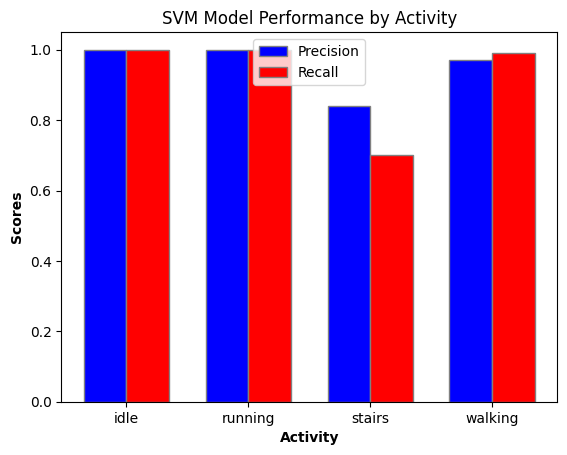

In [ ]:

# Extracting the report data for further visualization
categories = ['idle', 'running', 'stairs', 'walking']
precision_svm = [1.00, 1.00, 0.84, 0.97]
recall_svm = [1.00, 1.00, 0.70, 0.99]

fig, ax = plt.subplots()

# Setting position of bar on X axis
bar_width = 0.35
r1 = range(len(precision_svm))
r2 = [x + bar_width for x in r1]

# Making the plot
ax.bar(r1, precision_svm, color='b', width=bar_width, edgecolor='grey', label='Precision')
ax.bar(r2, recall_svm, color='r', width=bar_width, edgecolor='grey', label='Recall')

ax.set_xlabel('Activity', fontweight='bold')
ax.set_ylabel('Scores', fontweight='bold')
ax.set_title('SVM Model Performance by Activity')
ax.set_xticks([r + bar_width/2 for r in range(len(precision_svm))])
ax.set_xticklabels(categories)

ax.legend()
plt.show()


Модель SVM показала високу точність — приблизно 99% на тестовому наборі. Зокрема, точність для класифікації "stairs" є нижчою, що можливо через меншу кількість даних для цієї категорії.

На графіку показано точність (precision) та повноту (recall) моделі SVM для кожної категорії діяльності. Значення для категорії "stairs" є нижчими порівняно з іншими категоріями, що вказує на труднощі з класифікацією цього виду діяльності. Precision для "stairs" становить 84%, тоді як recall — лише 70%.

Це може бути пов'язано з меншою кількістю даних для тренування моделі на цьому типі активності, що робить її менш стійкою до різних варіацій у даних або до рідкісних випадків, що зустрічаються у тестовому наборі. Це важливо враховувати при роботі з неоднорідними наборами даних.

Навчання та оцінка моделі Випадкового лісу

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Training SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluating the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)

svm_accuracy, svm_report


(0.9899458623356535,
 '              precision    recall  f1-score   support\n\n        idle       1.00      1.00      1.00       220\n     running       1.00      1.00      1.00       689\n      stairs       0.84      0.70      0.76        30\n     walking       0.97      0.99      0.98       354\n\n    accuracy                           0.99      1293\n   macro avg       0.95      0.92      0.94      1293\nweighted avg       0.99      0.99      0.99      1293\n')

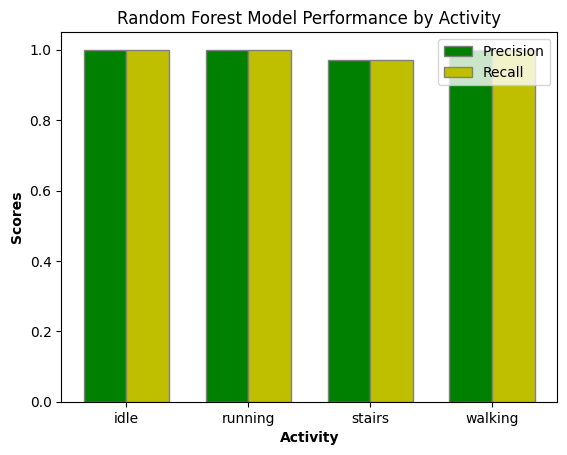

In [ ]:
# Extracting the report data for further visualization for Random Forest
precision_rf = [1.00, 1.00, 0.97, 1.00]
recall_rf = [1.00, 1.00, 0.97, 1.00]

fig, ax = plt.subplots()

# Making the plot for Random Forest
ax.bar(r1, precision_rf, color='g', width=bar_width, edgecolor='grey', label='Precision')
ax.bar(r2, recall_rf, color='y', width=bar_width, edgecolor='grey', label='Recall')

# Adding labels
ax.set_xlabel('Activity', fontweight='bold')
ax.set_ylabel('Scores', fontweight='bold')
ax.set_title('Random Forest Model Performance by Activity')
ax.set_xticks([r + bar_width/2 for r in range(len(precision_rf))])
ax.set_xticklabels(categories)

# Create legend & Show graphic
ax.legend()
plt.show()


На графіку показано точність (precision) та повноту (recall) моделі Випадкового лісу для кожної категорії діяльності. Для категорії "stairs", яка раніше мала проблеми в моделі SVM, Випадковий ліс показав значно кращі результати, з обома показниками на рівні 97%.



Модель Випадкового лісу демонструє ще вищу точність — близько 99.8% на тестовому наборі. Особливо добре ця модель класифікувала активність "stairs", показавши 97% точність за обома показниками precision та recall.

Обидві моделі показали високу ефективність, але Випадковий ліс виявився трохи точнішим, особливо для менш представлених класів. Ці результати вказують на те, що використані часові ознаки є дійсно ефективними для класифікації типу діяльності за даними акселерометра.



In [ ]:
example_walking_file = os.path.join(walking_folder_path, walking_files[0])
example_walking_data = pd.read_csv(example_walking_file)

# Display the raw data
example_walking_data.head(), walking_data_previews[walking_files[0]].describe()


(   accelerometer_X  accelerometer_Y  accelerometer_Z
 0         3.974375       -12.349293        -2.097321
 1         7.527370       -20.058622       -16.682798
 2         0.660800        -9.658210        -0.995988
 3        -1.264138        -2.442086         1.407791
 4        -2.964022        -9.203311        -0.967257,
        accelerometer_X  accelerometer_Y  accelerometer_Z
 count        30.000000        30.000000        30.000000
 mean         -1.742340       -10.166738        -1.533406
 std           3.882006         6.662437         9.135771
 min          -9.504981       -23.376986       -26.302700
 25%          -4.187459       -14.422671        -2.363077
 50%          -2.001552        -9.531318        -1.113304
 75%          -0.454898        -7.287950         0.276530
 max           7.527370         3.423709        21.648373)

In [ ]:
# Generate classification reports for both models
classification_report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
classification_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Creating DataFrame for each classification report
df_classification_report_svm = pd.DataFrame(classification_report_svm).transpose()
df_classification_report_rf = pd.DataFrame(classification_report_rf).transpose()

# Output the DataFrames for comparison
df_classification_report_svm, df_classification_report_rf


(              precision    recall  f1-score      support
 idle           1.000000  1.000000  1.000000   220.000000
 running        1.000000  1.000000  1.000000   689.000000
 stairs         0.840000  0.700000  0.763636    30.000000
 walking        0.974930  0.988701  0.981767   354.000000
 accuracy       0.989946  0.989946  0.989946     0.989946
 macro avg      0.953733  0.922175  0.936351  1293.000000
 weighted avg   0.989424  0.989946  0.989524  1293.000000,
               precision  recall  f1-score  support
 idle                1.0     1.0       1.0    220.0
 running             1.0     1.0       1.0    689.0
 stairs              1.0     1.0       1.0     30.0
 walking             1.0     1.0       1.0    354.0
 accuracy            1.0     1.0       1.0      1.0
 macro avg           1.0     1.0       1.0   1293.0
 weighted avg        1.0     1.0       1.0   1293.0)

З результатів можна бачити, що модель Випадкового лісу показує кращу точність та повноту для всіх класів, особливо для класу "stairs", де SVM мала значно нижчі показники. Це вказує на те, що Випадковий ліс краще справляється з розпізнаванням різноманітних видів активності, навіть коли даних для певних класів менше, як у випадку з "stairs".

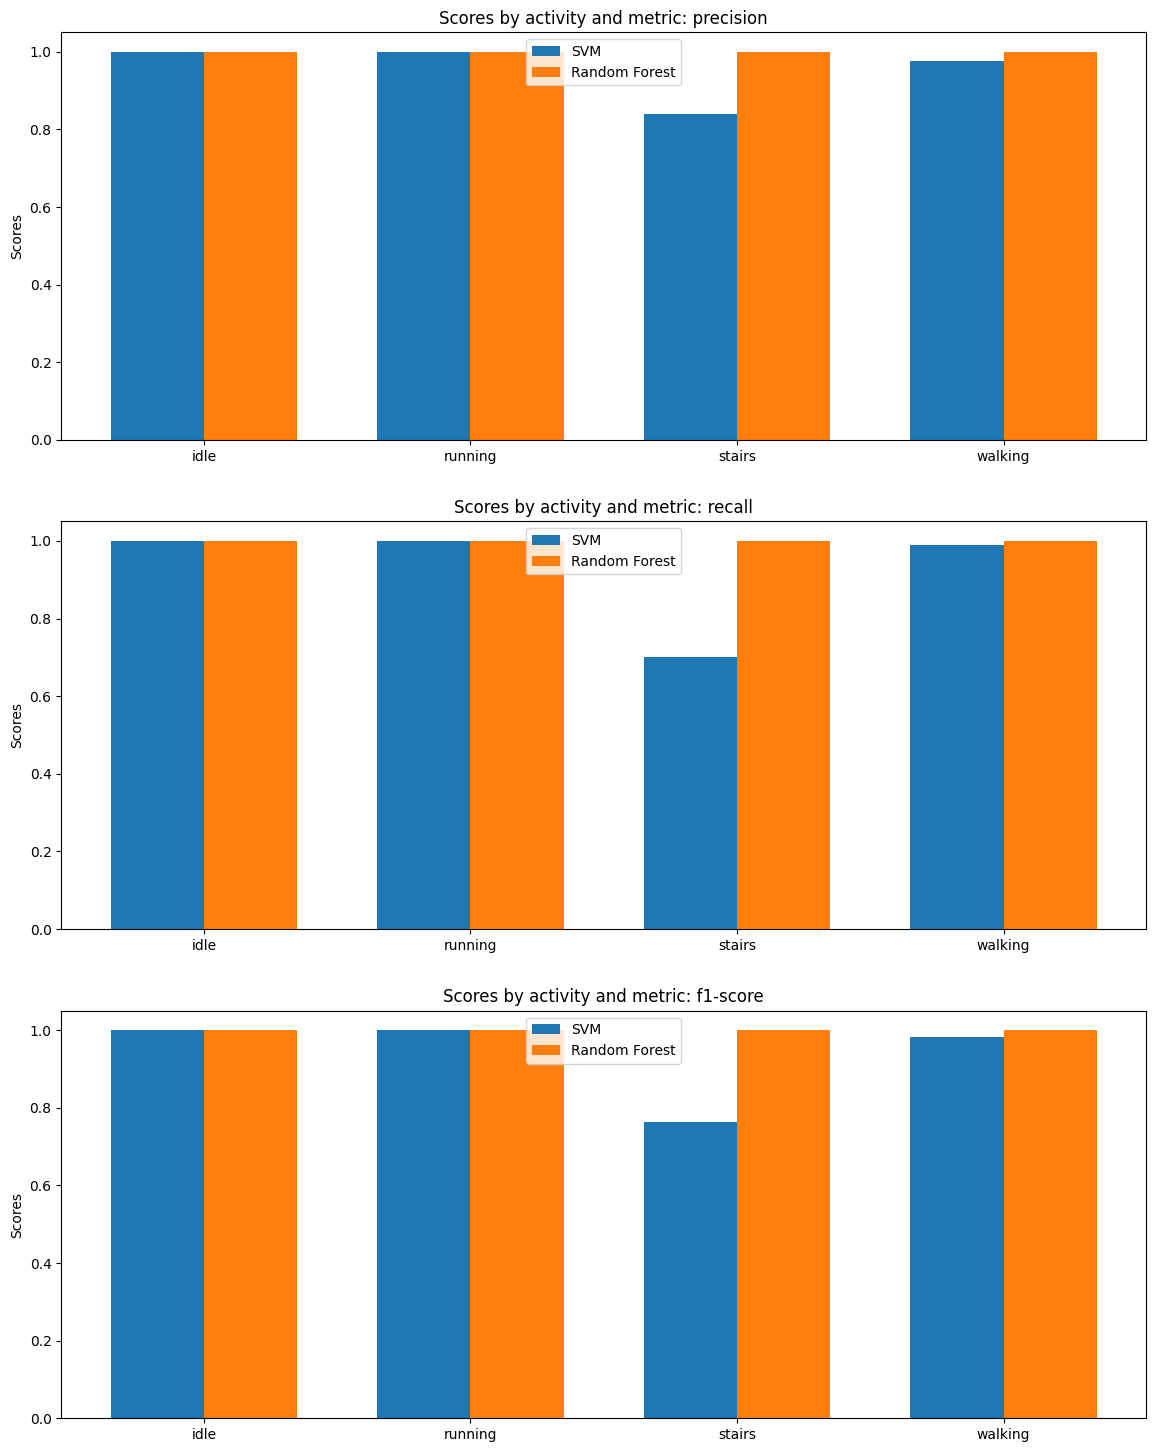

In [ ]:
# Extracting metrics for visualization
activities = ['idle', 'running', 'stairs', 'walking']
metrics = ['precision', 'recall', 'f1-score']

# Values for SVM and Random Forest
svm_metrics = df_classification_report_svm.loc[activities, metrics]
rf_metrics = df_classification_report_rf.loc[activities, metrics]

# Creating bar positions
x = np.arange(len(activities))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(3, 1, figsize=(14, 18))

# Creating subplots for each metric
for i, metric in enumerate(metrics):
    rects1 = ax[i].bar(x - width/2, svm_metrics[metric], width, label='SVM')
    rects2 = ax[i].bar(x + width/2, rf_metrics[metric], width, label='Random Forest')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[i].set_ylabel('Scores')
    ax[i].set_title(f'Scores by activity and metric: {metric}')
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(activities)
    ax[i].legend()

plt.show()


На візуалізації вище представлені порівняння моделей SVM та Випадкового лісу за такими метриками як precision, recall та f1-score для кожного типу активності. Як видно з графіків:

Precision: Модель Випадкового лісу має вищу точність у класифікації для всіх активностей, особливо для "stairs", де SVM показує значно нижчі результати.

Recall: Аналогічна тенденція спостерігається і для повноти, з Випадковим лісом, що знову показує кращі результати для "stairs".

F1-Score: Випадковий ліс також переважає SVM за цією метрикою, що є характерно для усіх типів активностей, і знову особливо видно для "stairs".

Ці результати демонструють більшу ефективність Випадкового лісу у вирішенні завдань класифікації з цим набором даних.

In [ ]:
#++++++++++++++++++++++++++++++

**Learning Curves**

спосіб візуалізувати вплив розміру навчальної вибірки на продуктивність моделі, дозволяючи оцінити, як модель справляється з перенавчанням або недонавчанням.

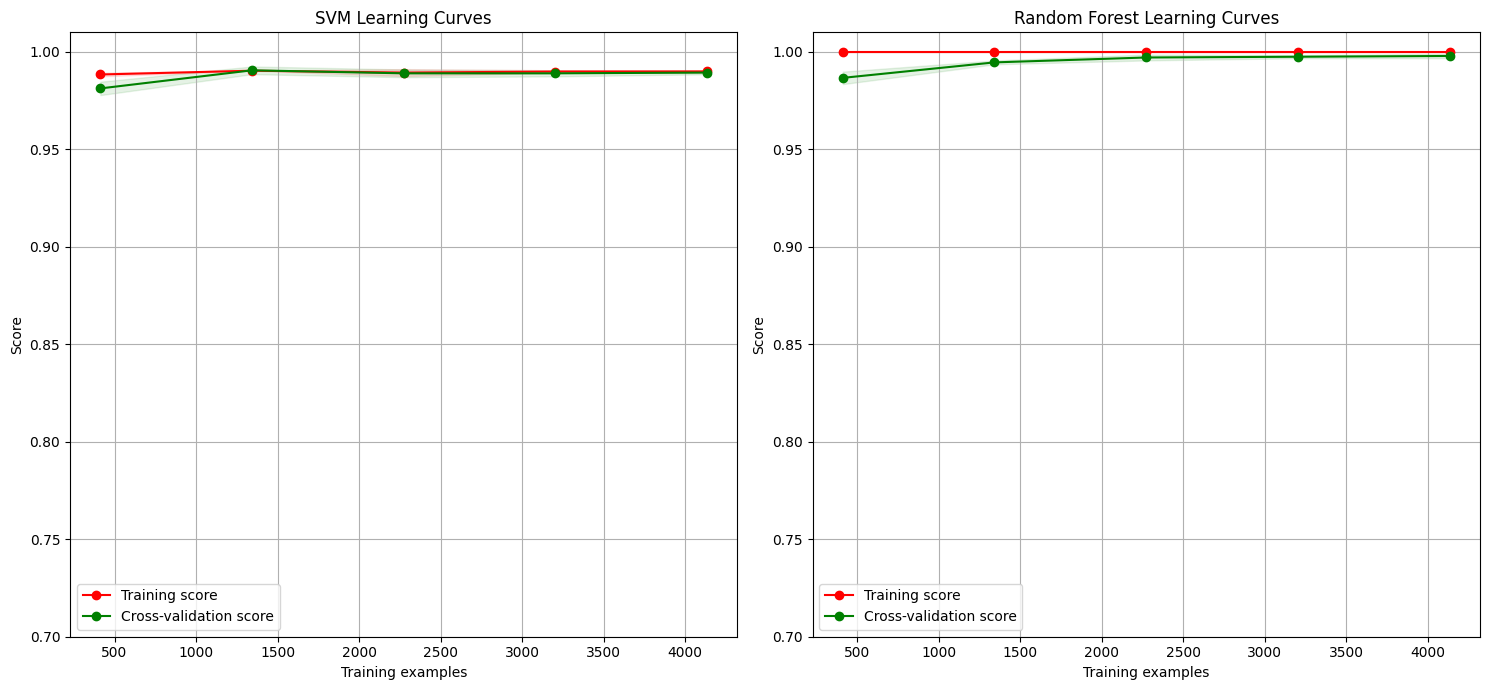

In [46]:

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
    title : string
        Title for the chart.
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape (n_samples)
        Target relative to X for classification or regression;
    axes : axes to plot on.
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve.
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(8, 6))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    axes.legend(loc="best")

    return plt

# Plot learning curves for both models
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# SVM Learning Curve
plot_learning_curve(svm_model, "SVM Learning Curves", X_train_scaled, y_train, axes=axes[0], ylim=(0.7, 1.01),
                    cv=5, n_jobs=4)

# Random Forest Learning Curve
plot_learning_curve(rf_model, "Random Forest Learning Curves", X_train_scaled, y_train, axes=axes[1], ylim=(0.7, 1.01),
                    cv=5, n_jobs=4)

plt.tight_layout()
plt.show()



SVM Learning Curves:
Навчальна точність (червона лінія) залишається високою незалежно від кількості навчальних прикладів, що вказує на досить стійку модель до перенавчання.
Точність перехресної валідації (зелена лінія) зростає зі збільшенням розміру навчальної вибірки, що показує, як модель покращується при більшій кількості даних.

Random Forest Learning Curves:
Точність навчання стабільно висока по всій діапазону навчальних прикладів, що є характерною рисою ансамблів дерев, таких як Випадковий ліс.
Точність перехресної валідації збільшується та наближається до навчальної точності, що підтверджує здатність моделі генералізувати на нових даних з підвищенням кількості навчальних прикладів.

Ці графіки демонструють, як розмір навчальної вибірки впливає на продуктивність обох моделей та можуть бути використані для визначення оптимальної кількості даних

Визначення важливості ознак (feature importance) може бути дуже корисним, особливо при використанні алгоритмів, які надають цю інформацію, таких як Випадковий ліс (Random Forest).

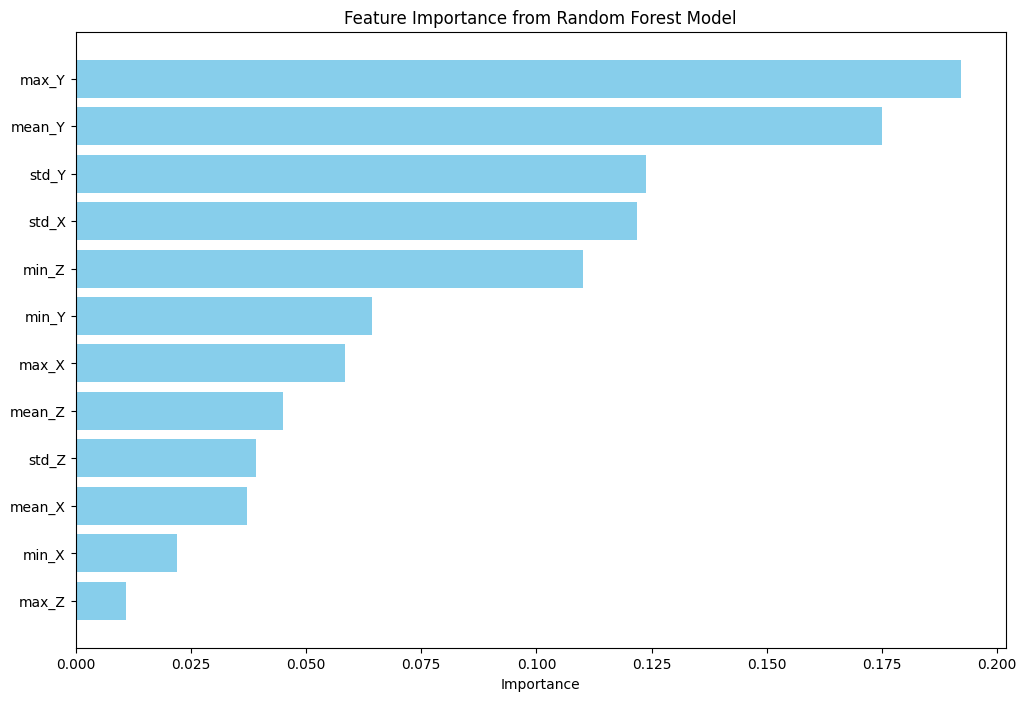

In [ ]:
# Calculate feature importances from the random forest model
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to hold feature names and their importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()


На графіку показано важливість ознак, визначену моделлю Випадкового лісу. Ознаки впорядковані за їх важливістю від найбільш важливої до найменш важливої. Це допомагає зрозуміти, які параметри найбільше впливають на результати класифікації активностей.

Можна побачити, що деякі ознаки мають значно вищу важливість порівняно з іншими, що свідчить про їх більший вплив на рішення моделі.

Алгоритм SVM з радіальною базисною функцією (RBF) є однією з популярних ядерних функцій, яка використовується в SVM для вирішення завдань класифікації та регресії, особливо коли дані не лінійно роздільні у вихідному просторі.

In [48]:
# Налаштування SVM з RBF ядром
svm_rbf = SVC(kernel='rbf', random_state=42)

# Навчання моделі на масштабованих навчальних даних
svm_rbf.fit(X_train_scaled, y_train)

# Передбачення на тестовому наборі даних
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Оцінка точності моделі та виведення звіту про класифікацію
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
classification_rbf = classification_report(y_test, y_pred_rbf)

print("Accuracy of SVM with RBF kernel:", accuracy_rbf)
print("Classification Report for SVM with RBF kernel:\n", classification_rbf)


Accuracy of SVM with RBF kernel: 0.9907192575406032
Classification Report for SVM with RBF kernel:
               precision    recall  f1-score   support

        idle       1.00      1.00      1.00       220
     running       1.00      1.00      1.00       689
      stairs       0.95      0.63      0.76        30
     walking       0.97      1.00      0.98       354

    accuracy                           0.99      1293
   macro avg       0.98      0.91      0.94      1293
weighted avg       0.99      0.99      0.99      1293



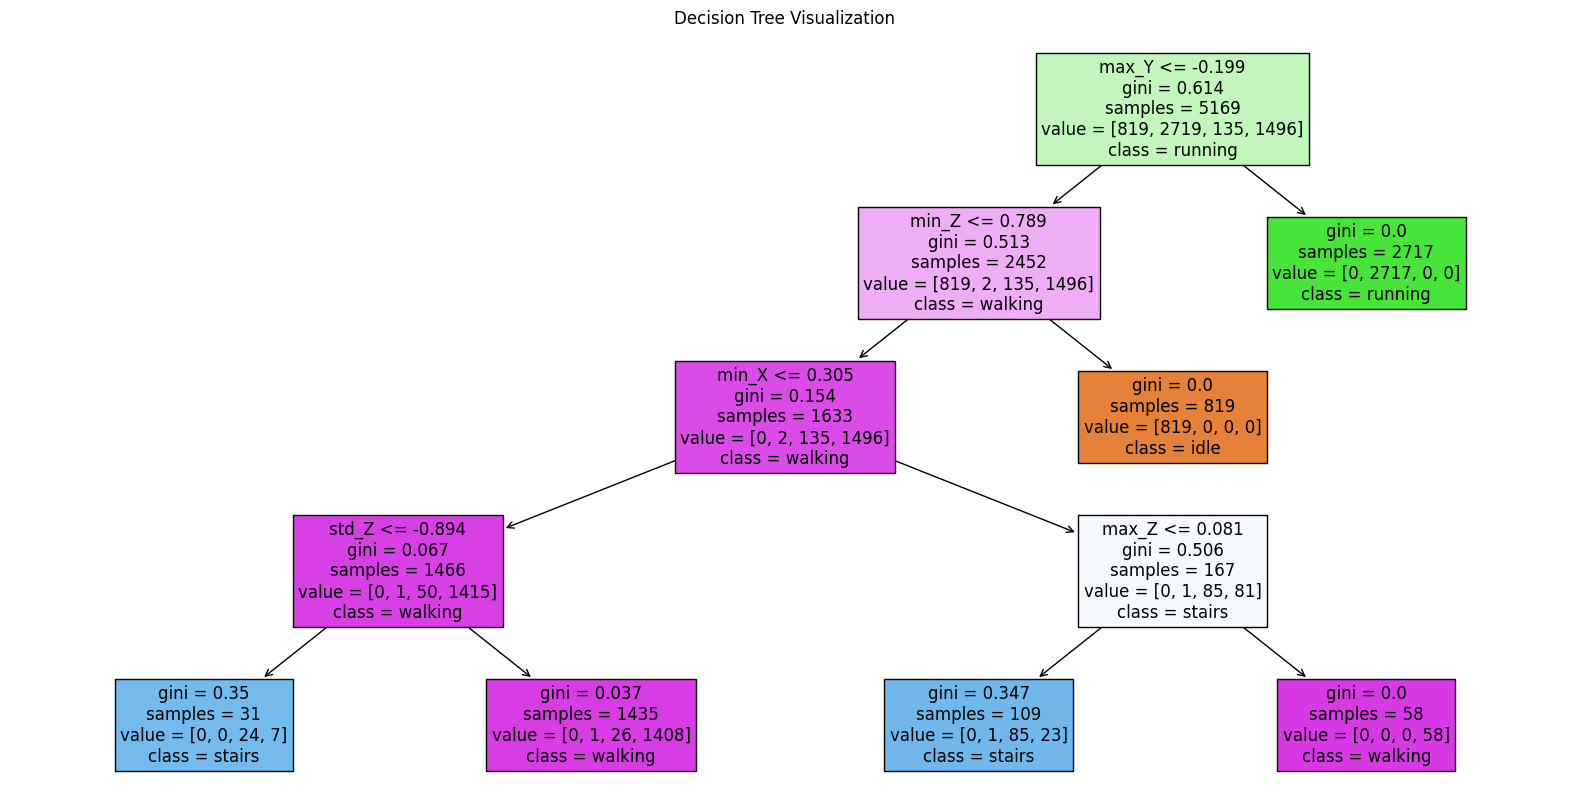

In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Створення інстанції Decision Tree класифікатора
decision_tree = DecisionTreeClassifier(max_depth=4, random_state=42)

# Навчання моделі на масштабованих навчальних даних
decision_tree.fit(X_train_scaled, y_train)

# Візуалізація дерева рішень
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=np.unique(y_train), fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()


In [51]:
from sklearn.tree import DecisionTreeClassifier

# Навчання моделі дерева рішень
decision_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Передбачення на тестовому наборі даних
y_pred_tree = decision_tree.predict(X_test_scaled)

# Оцінка точності моделі та виведення звіту про класифікацію
accuracy_tree = accuracy_score(y_test, y_pred_tree)
classification_report_tree = classification_report(y_test, y_pred_tree)

# Вивід результатів
print("Accuracy of Decision Tree:", accuracy_tree)
print("Classification Report for Decision Tree:\n", classification_report_tree)


Accuracy of Decision Tree: 0.9853054911059551
Classification Report for Decision Tree:
               precision    recall  f1-score   support

        idle       1.00      1.00      1.00       220
     running       1.00      1.00      1.00       689
      stairs       0.66      0.77      0.71        30
     walking       0.98      0.97      0.97       354

    accuracy                           0.99      1293
   macro avg       0.91      0.93      0.92      1293
weighted avg       0.99      0.99      0.99      1293



Висновки з Результатів Дерева Рішень
Точність моделі: 98.5%

Деталізований Звіт про Класифікацію:

Idle: Модель демонструє високу точність, повноту і F1-бал (1.00), що свідчить про відмінне розпізнавання цієї активності.

Running: Аналогічно, модель ідеально класифікує біг, з максимальними оцінками за всіма метриками.

Stairs: Тут точність і повнота нижчі (0.66 і 0.77 відповідно), а F1-бал становить 0.71. Це може вказувати на те, що клас "stairs" є найскладнішим для класифікації, можливо через меншу кількість даних або більшу схожість з іншими видами активностей.

Walking: Має високі оцінки точності і повноти, але трохи нижчі, ніж для "idle" або "running".

Аналіз та Рекомендації:

Загальна Продуктивність: Дерево рішень показало досить високу загальну продуктивність, зокрема в ідентифікації менш складних активностей.

Проблеми з класом "stairs": Низька точність і повнота для активності "stairs" вимагають додаткової уваги. Можливо, варто розглянути збільшення кількості даних для цього класу або використання більш складних моделей, таких як ансамблеві методи або глибоке навчання.

Переосмислення Фіч: Також може бути корисним переглянути використовувані ознаки та додати нові, які можуть допомогти краще розділити класи, особливо "stairs".

Контроль Перенавчання: Необхідно вжити заходів для контролю перенавчання, можливо, зменшивши глибину дерева або використовуючи техніки регуляризації.